# Contents

----

----

__This notebook investigates Breast Cancer prediction data derived from `Ming et al.` (Gail model)__ [1].

__Mondrian Conformal Prediction is applied to the Nonconformity Measure: `InverseProbability`.__

__Nonconformity Measure `InverseProbability` is applied to the underlying classifier: `LogisticRegression`.__

Using MCP, conditional on the category `Race`, we investigate the relationship between sample size and the equitable representation of individuals belonging to a given race that fall within the low-confidence region of predictions. The low-confidence region is defined as the Lower-Decile Region (LDR) of predictions, ranked by `confidence` and `credibility`, respectively.

----

###### 1. Ming C, Viassolo V, Probst-Hensch N, Chappuis PO, Dinov ID, Katapodi MC. Machine learning techniques for personalized breast cancer risk prediction: comparison with the BCRAT and BOADICEA models. Breast Cancer Research 2019;21(1):75 doi: 10.1186/s13058-019-1158-4[published Online First: Epub Date]|. 

----

In [4]:
#imports/pwd
import os

# set pwd to root of repository
repo_root = 'C:/Users/Bob/CHPC/conformal_prediction/vigilant-computing-machine/'
os.chdir(repo_root)

# 'vigilant-computing-machine/source/util.py'
import source.util as util
import matplotlib.pyplot as plt

----
__define plot function__

In [5]:
def plot_rep_6exp(exp_df_list):
    col = 2
    row = 3
    fig, axs = plt.subplots(row, col)
    fig.set_figheight(32)
    fig.set_figwidth(24)
    for i in range(row * col):
        row_idx = i // col
        col_idx = i % col
        util.plot_race_representation_from_experiment(exp_df_list[i], ax=axs[row_idx, col_idx])
    plt.show()

----
__read in experiment results__

In [6]:
experiments_rcic = \
    [     
     util.read_experiment('./results/logistic_regression_1200_balanced_race-conditional_experiment.csv'),
     util.read_experiment('./results/logistic_regression_12000_balanced_race-conditional_experiment.csv'),
     util.read_experiment('./results/logistic_regression_1200_race-unique_balanced_race-conditional_experiment.csv'),
     util.read_experiment('./results/logistic_regression_12000_race-unique_balanced_race-conditional_experiment.csv'),
     util.read_experiment('./results/logistic_regression_1200_race-unique-inverted_balanced_race-conditional_experiment.csv'),
     util.read_experiment('./results/logistic_regression_12000_race-unique-inverted_balanced_race-conditional_experiment.csv')
    ]

----
__plot experiment results__

- __Data__
    - __Ming et al.__
        - `n=1200`
        - `n=12000`
    - __Race-Unique Risk__
        - `n=1200`
        - `n=12000`
    - __Race-Unique Risk Inverted__
        - `n=1200`
        - `n=12000`
        
----

| |`n=1200` | `n=12000`|
--- | ---| ---| 
|__Ming et al.__ | 1xM | 10xM |
|__Race-Unique Risk__ | 1xRUR | 10xRUR |
|__R-U Risk Inverted__ | 1xRURI | 10xRURI |


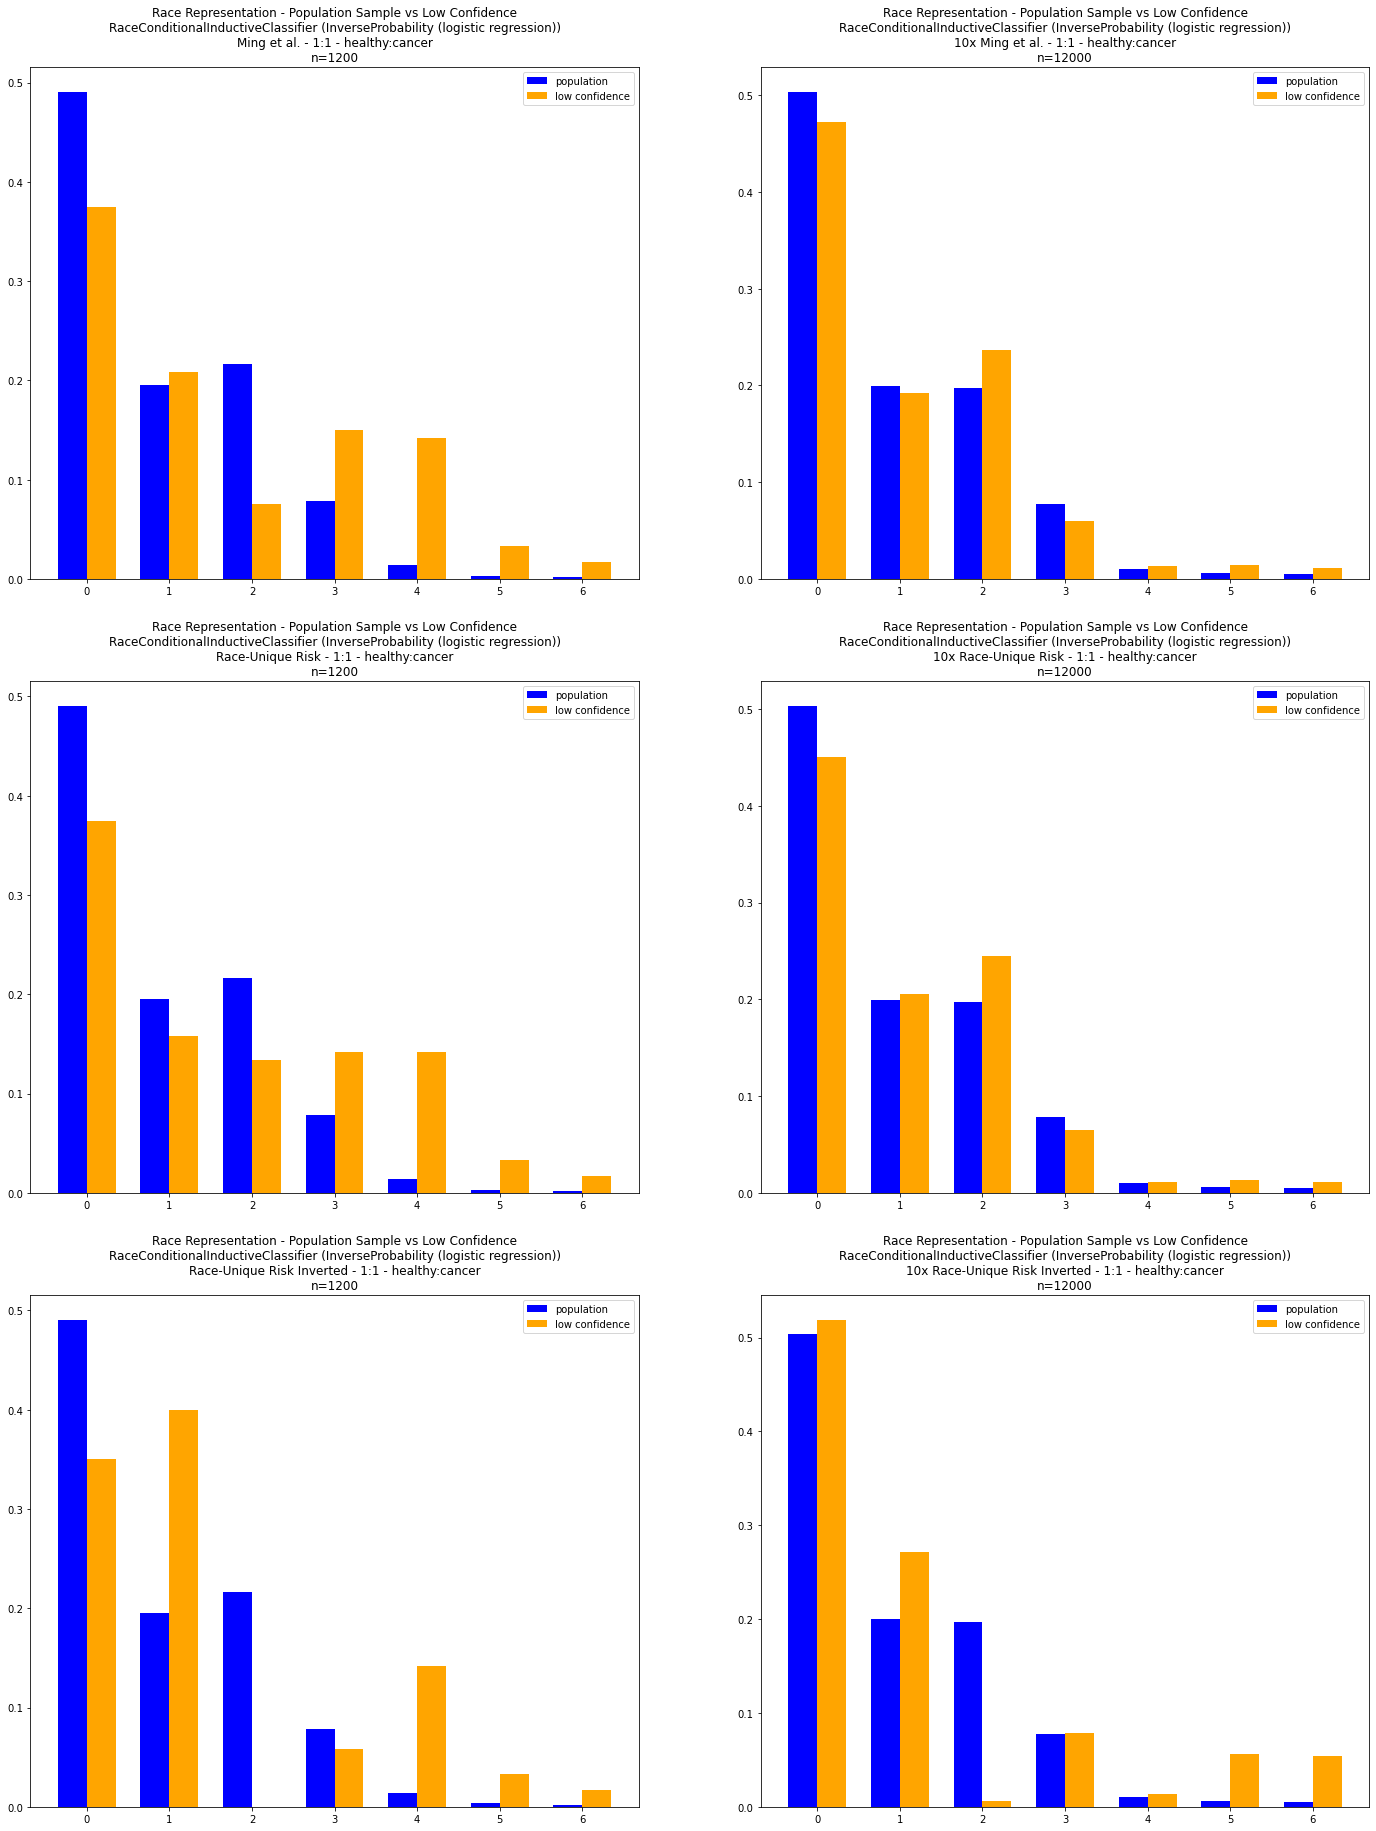

In [8]:
plot_rep_6exp(experiments_rcic)

__Cursory Observation:__

__Blind__ sample supplementation tends to either:
- drive equity of `Race` representation in the low-confidence region
- highlight `Race` group(s) where __reduced monetary expense__ may result from __targeted__ sample supplementation

----

__Preliminary Conclusions:__

CP methods may provide a means to determine the __minimum-viable sample__ size of individual groups that may otherwise be under-represented, or systematically excluded, helping __ensure equity__ in the results of __clinical biomedical research__ and __clinical predictive tools__.